In [93]:
%pip install imbalanced-learn

%matplotlib inline
import numpy as np
import pandas as pd

import sklearn 
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from imblearn.ensemble import BalancedBaggingClassifier, BalancedRandomForestClassifier

import matplotlib.pylab as plt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Drop columns (axis=1) that are not useful to train

In [94]:
to_remove = ["job_name", "reason","channel","n_issues","ok_since","zip","gender"] 
df_train = pd.read_csv("../data/puzzle_train_dataset.csv").set_index("ids").drop(to_remove, axis=1)
df_test = pd.read_csv("../data/puzzle_test_dataset.csv").set_index("ids").drop(to_remove, axis=1)

In [95]:
df_train.head()
# df_train.describe()
# df_train.info()

,default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,amount_borrowed,borrowed_in_months,credit_limit,income,sign,facebook_profile,state,real_state,n_bankruptcies,n_defaulted_loans,n_accounts
ids,,,,,,,,,,,,,,,,,,,
810e3277-619e-3154-7ba0-ebddfc5f7ea9,False,smzX0nxh5QlePvtVf6EAeg==,tHpS8e9F8d9zg3iOQM9tsA==,710.0,104.174961,0.661509,123.015325,0.43,20024.31,60.0,62386.0,59869.05,virg,True,xsd3ZdsI3356I3xMxZeiqQ==,n+xK9CfX0bCn77lClTWviw==,1.0,0.0,9.0
b4118fd5-77d5-4d80-3617-bacd7aaf1a88,False,DGCQep2AE5QRkNCshIAlFQ==,RO7MTL+j4PH2gNzbhNTq/A==,330.0,97.880798,0.531115,110.913484,0.23,10046.51,36.0,NaN,46016.31,sagi,False,xsd3ZdsI3356I3xMxZeiqQ==,n+xK9CfX0bCn77lClTWviw==,0.0,0.0,3.0
a75638f1-4662-4f4f-044a-d649b676d85d,False,8k8UDR4Yx0qasAjkGrUZLw==,wkeCdGeu5sEv4/fjwR0aDg==,360.0,97.908925,0.611086,104.620791,0.30,21228.25,60.0,NaN,48025.47,libr,True,/L8vvVesB5WyAv190Hw/rQ==,N5/CE7lSkAfB04hVFFwllw==,0.0,0.0,5.0
285ce334-3602-42b3-51cb-eebfcba48a09,False,4DLlLW62jReXaqbPaHp1vQ==,tQUTfUyeuGkhRotd+6WjVg==,120.0,100.434557,0.139784,120.134718,0.15,23032.33,36.0,NaN,46011.12,NaN,False,GW2VZ3dN3OGHSjQ6JkfqQw==,N5/CE7lSkAfB04hVFFwllw==,0.0,0.0,5.0
e643bf65-9288-92f2-df13-eed631fe237c,False,4DLlLW62jReXaqbPaHp1vQ==,7h8PTkrlTWUPP3yuyP4rUg==,330.0,103.774638,0.002856,104.320462,0.08,24026.29,36.0,32366.0,90026.17,libr,NaN,sjJbkqJS7cXalHLBFA+EOQ==,N5/CE7lSkAfB04hVFFwllw==,0.0,0.0,10.0


In [96]:
print("Number of train samples: %d" %df_train.shape[0])
print("Number of test samples:  %d" %df_test.shape[0])
print("Number of features: %d" %(df_train.shape[1]-1))
ratio = df_train['default'].value_counts()[0] / df_train['default'].value_counts()[1]
print("Classes ratio (False/True):", ratio)

Number of train samples: 64592
Number of test samples:  35000
Number of features: 18
Classes ratio (False/True): 5.305573080967402


Remove all rows where the default column has missing (NaN) values

In [97]:
df_train = df_train[pd.notnull(df_train['default'])]
df_train["default"] = df_train["default"].astype("int")

In [98]:
feats_info = pd.concat([df_train.isnull().sum(), df_train.dtypes, df_train.T.apply(lambda x: x.nunique(), axis=1)], axis=1)
feats_info.columns = ["Missing","Type","Unique"]
print("\n Dataset Information (missing features, data type, unique values)")
print(feats_info)


 Dataset Information (missing features, data type, unique values)
                    Missing     Type  Unique
default                   0    int64       2
score_1                   0      str       7
score_2                   0      str      35
score_3                   0  float64      87
score_4                   0  float64   59966
score_5                   0  float64   59966
score_6                   0  float64   59966
risk_rate                 0  float64      81
amount_borrowed           0  float64   50484
borrowed_in_months        0  float64       2
credit_limit          18779  float64   26238
income                    0  float64   54273
sign                  18938      str      12
facebook_profile       5971   object       2
state                     0      str      50
real_state                0      str       5
n_bankruptcies          202  float64       7
n_defaulted_loans        18  float64       5
n_accounts                0  float64      45


Create additional binary features flag for missing values for all columns in the dataset

In [99]:
for col in df_test.columns:
    df_train["is_" + col + "_missing"] = df_train[col].isnull() * 1
    df_test["is_" + col + "_missing"] = df_test[col].isnull() * 1

Represent categorical feature (non number valued columns) as a series o binary values and drop first column to avoid redundancy

In [100]:
df_train = pd.get_dummies(df_train, columns=['score_1','score_2','real_state','state','sign'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['score_1','score_2','real_state','state','sign'], drop_first=True)

In [101]:
df_train.head()

,default,score_3,score_4,score_5,score_6,risk_rate,amount_borrowed,borrowed_in_months,credit_limit,income,...,sign_cance,sign_capr,sign_gemi,sign_leo,sign_libr,sign_pisce,sign_sagi,sign_scor,sign_taur,sign_virg
ids,,,,,,,,,,,,,,,,,,,,,
810e3277-619e-3154-7ba0-ebddfc5f7ea9,0,710.0,104.174961,0.661509,123.015325,0.43,20024.31,60.0,62386.0,59869.05,...,False,False,False,False,False,False,False,False,False,True
b4118fd5-77d5-4d80-3617-bacd7aaf1a88,0,330.0,97.880798,0.531115,110.913484,0.23,10046.51,36.0,NaN,46016.31,...,False,False,False,False,False,False,True,False,False,False
a75638f1-4662-4f4f-044a-d649b676d85d,0,360.0,97.908925,0.611086,104.620791,0.30,21228.25,60.0,NaN,48025.47,...,False,False,False,False,True,False,False,False,False,False
285ce334-3602-42b3-51cb-eebfcba48a09,0,120.0,100.434557,0.139784,120.134718,0.15,23032.33,36.0,NaN,46011.12,...,False,False,False,False,False,False,False,False,False,False
e643bf65-9288-92f2-df13-eed631fe237c,0,330.0,103.774638,0.002856,104.320462,0.08,24026.29,36.0,32366.0,90026.17,...,False,False,False,False,True,False,False,False,False,False


Encode categorical variables using custom fucntion to replace NaN by -1

In [102]:
def get_encoder(df, col):
    dft = df[col].astype(str).to_frame().copy()
    dft["count"] = 1
    return dft.groupby(col).count().to_dict()["count"]
    
def encode_all(df_train, df_test, cols):
    for col in cols:
        enc = get_encoder(df_train, col)
        df_train[col] = df_train[col].astype(str).apply(lambda x: enc.get(x, -1))
        df_test[col] = df_test[col].astype(str).apply(lambda x: enc.get(x, -1))
    return df_train, df_test

In [103]:
encode_cols = df_train.dtypes
encode_cols = encode_cols[encode_cols == object].index.tolist()
print("Encoding columns:", encode_cols)

Encoding columns: ['facebook_profile']


In [104]:
df_train, df_test = encode_all(df_train, df_test, encode_cols)
df_train, df_test = df_train.fillna(-1), df_test.fillna(-1)

Training

In [105]:
X_train, y_train = df_train.drop(["default"], axis=1), df_train["default"]
X_test = df_test

In [106]:
X_train.head()

,score_3,score_4,score_5,score_6,risk_rate,amount_borrowed,borrowed_in_months,credit_limit,income,facebook_profile,...,sign_cance,sign_capr,sign_gemi,sign_leo,sign_libr,sign_pisce,sign_sagi,sign_scor,sign_taur,sign_virg
ids,,,,,,,,,,,,,,,,,,,,,
810e3277-619e-3154-7ba0-ebddfc5f7ea9,710.0,104.174961,0.661509,123.015325,0.43,20024.31,60.0,62386.0,59869.05,19998,...,False,False,False,False,False,False,False,False,False,True
b4118fd5-77d5-4d80-3617-bacd7aaf1a88,330.0,97.880798,0.531115,110.913484,0.23,10046.51,36.0,-1.0,46016.31,33997,...,False,False,False,False,False,False,True,False,False,False
a75638f1-4662-4f4f-044a-d649b676d85d,360.0,97.908925,0.611086,104.620791,0.30,21228.25,60.0,-1.0,48025.47,19998,...,False,False,False,False,True,False,False,False,False,False
285ce334-3602-42b3-51cb-eebfcba48a09,120.0,100.434557,0.139784,120.134718,0.15,23032.33,36.0,-1.0,46011.12,33997,...,False,False,False,False,False,False,False,False,False,False
e643bf65-9288-92f2-df13-eed631fe237c,330.0,103.774638,0.002856,104.320462,0.08,24026.29,36.0,32366.0,90026.17,-1,...,False,False,False,False,True,False,False,False,False,False


In [107]:
X_test.head()

,score_3,score_4,score_5,score_6,risk_rate,amount_borrowed,borrowed_in_months,credit_limit,income,facebook_profile,...,sign_cance,sign_capr,sign_gemi,sign_leo,sign_libr,sign_pisce,sign_sagi,sign_scor,sign_taur,sign_virg
ids,,,,,,,,,,,,,,,,,,,,,
e4366223-7aa2-0904-7a47-66479ae46b2a,230.0,101.906686,0.677760,77.245320,0.22,21016.38,36.0,43666.0,156021.02,19998,...,False,False,False,False,False,False,False,False,False,False
c6416108-c6d7-e6be-c4b5-923dd36c8ec4,400.0,96.276632,0.278711,94.980774,0.13,1211.74,36.0,-1.0,8410.56,33997,...,False,False,False,False,False,False,True,False,False,False
a90d3929-86ec-2414-89ba-543776b0e82b,420.0,98.901695,0.894661,108.136546,0.25,6990.63,36.0,-1.0,45116.60,19998,...,False,False,True,False,False,False,False,False,False,False
c5b96a7f-389a-28d0-242d-95db05e69da0,490.0,95.975994,0.972729,126.120768,0.46,15025.67,60.0,71273.0,60029.26,19998,...,False,False,False,False,False,False,False,False,False,False
1b461faa-926d-565d-b15d-0b452968ac81,320.0,101.303601,0.234202,107.162760,0.29,7027.81,36.0,-1.0,27618.96,33997,...,False,False,True,False,False,False,False,False,False,False


In [108]:
X_train.info()

<class 'pandas.DataFrame'>
Index: 59966 entries, 810e3277-619e-3154-7ba0-ebddfc5f7ea9 to 4af97ab2-945c-9bf0-b636-d5b5ae8e9cc6
Columns: 135 entries, score_3 to sign_virg
dtypes: bool(104), float64(12), int64(19)
memory usage: 20.6+ MB


(11994, 2)
AUC score on fold 0: 0.754
(11993, 2)
AUC score on fold 1: 0.758
(11993, 2)
AUC score on fold 2: 0.756
(11993, 2)
AUC score on fold 3: 0.767
(11993, 2)
AUC score on fold 4: 0.761
AUC: 0.759 +- 0.0045

Confusion matrix:
[[50037.   419.]
 [ 8501.  1009.]]

Accuracy 0.851


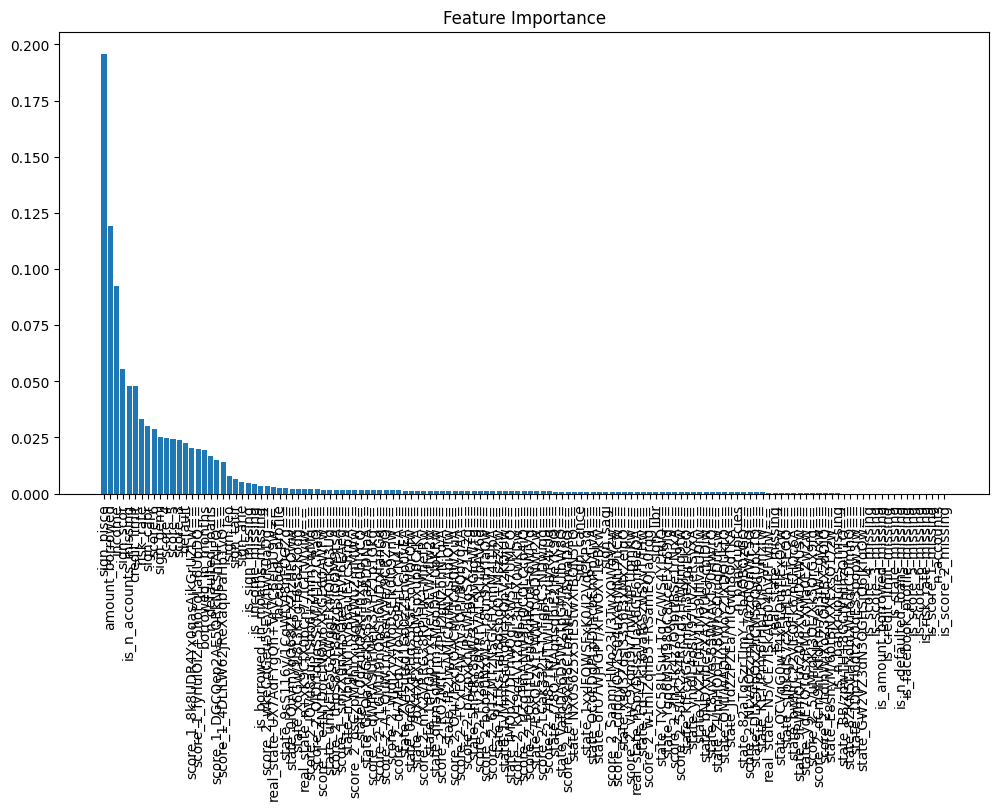

In [109]:
#model and setup
clf = RandomForestClassifier(n_estimators=250, max_depth=10, random_state=0, max_features=25, oob_score=True)
skf = StratifiedKFold( 5, shuffle=True, random_state=100)

# initializing metrics
cm = np.zeros((2,2))
aucs = []

# cross validation accross folds
for (fold, (i_train, i_test)) in enumerate(skf.split(X_train,y_train)):
    clf.fit(X_train.iloc[i_train], y_train.iloc[i_train])
    i_pred_proba = clf.predict_proba(X_train.iloc[i_test])
    pred = clf.predict(X_train.iloc[i_test])
    print(i_pred_proba.shape)
    auc = metrics.roc_auc_score(y_train.iloc[i_test], i_pred_proba[:, 1])
    aucs.append(auc)
    
    cm += metrics.confusion_matrix(y_train.iloc[i_test],pred)
    print("AUC score on fold %i: %2.3f" % (fold, auc))

print("AUC: %2.3f +- %2.4f" % (np.mean(aucs), np.std(aucs)))
print("\nConfusion matrix:")
print(cm)
print("\nAccuracy %2.3f" %(cm.diagonal().sum()/cm.sum()))

# train full set
clf.fit(X_train,y_train)

# features importance vuisualization
importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
plt.bar(range(1, indices.size + 1), importances[indices], align="center")
plt.xticks(range(1, indices.size + 1),
           df_train.columns[indices],
           rotation=90)
plt.title("Feature Importance")
plt.show()

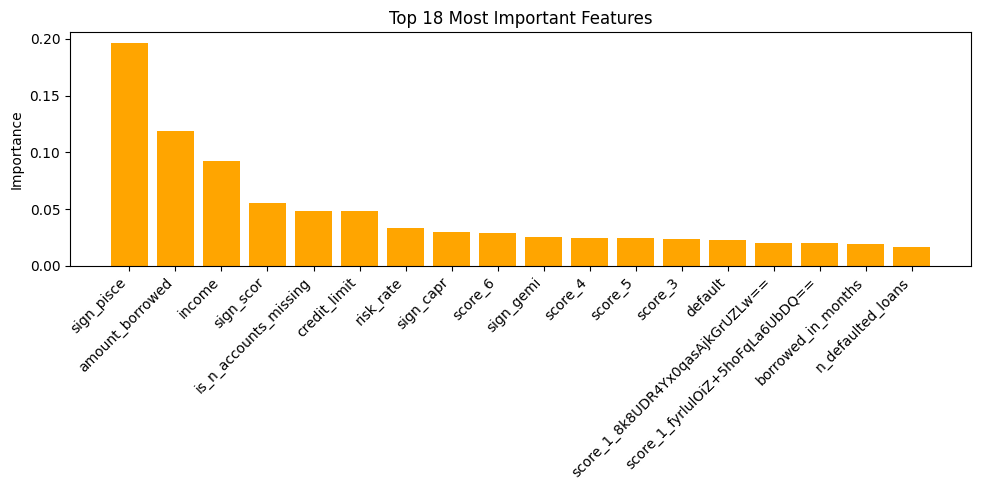

In [110]:
top_n = 18
top_indices = indices[:top_n]

plt.figure(figsize=(10, 5))
plt.bar(range(1, top_n + 1), importances[top_indices], align="center", color="orange")
plt.xticks(range(1, top_n + 1),
           df_train.columns[top_indices],
           rotation=45, ha='right')
plt.title(f"Top {top_n} Most Important Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

(11994, 2)
AUC score on fold 0: 0.758
(11993, 2)
AUC score on fold 1: 0.759
(11993, 2)
AUC score on fold 2: 0.757
(11993, 2)
AUC score on fold 3: 0.767
(11993, 2)
AUC score on fold 4: 0.763
AUC: 0.761 +- 0.0037

Confusion matrix:
[[36795. 13661.]
 [ 3251.  6259.]]

Accuracy 0.718


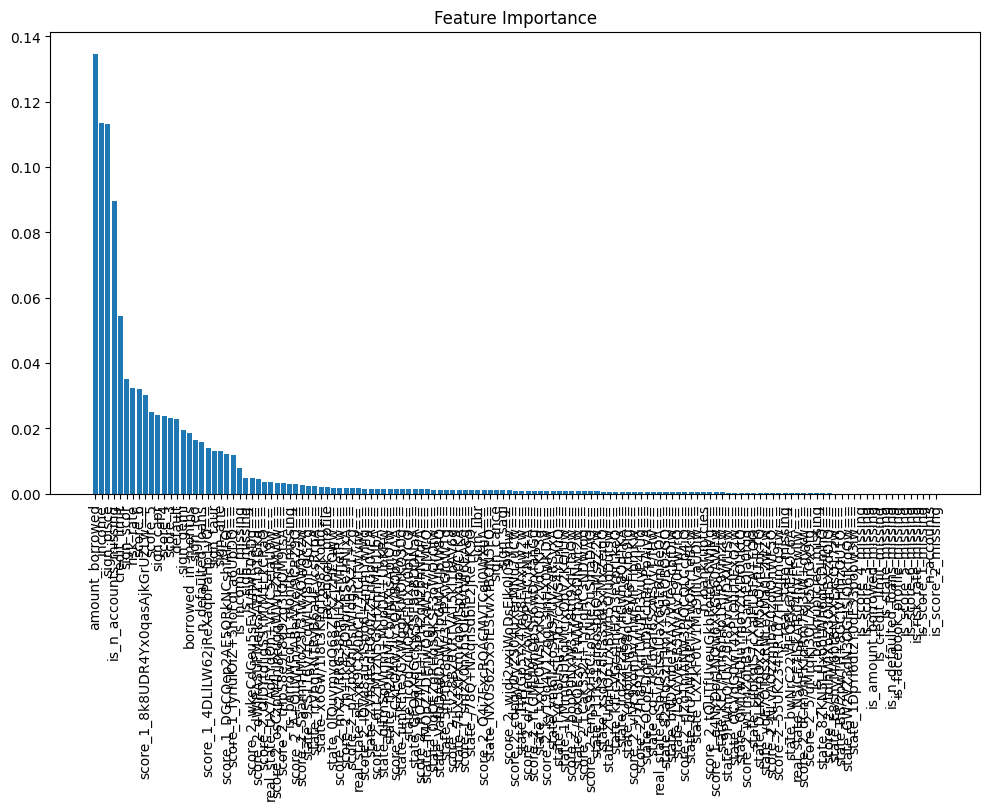

In [113]:
clf2 = BalancedRandomForestClassifier(n_estimators=250, max_depth=10, random_state=0, max_features=25)

cm2 = np.zeros((2,2))
aucs2 = []
for (fold, (i_train, i_test)) in enumerate(skf.split(X_train,y_train)):
    clf2.fit(X_train.iloc[i_train], y_train.iloc[i_train])
    i_pred_proba = clf2.predict_proba(X_train.iloc[i_test])
    pred = clf2.predict(X_train.iloc[i_test])
    print(i_pred_proba.shape)
    auc = metrics.roc_auc_score(y_train.iloc[i_test], i_pred_proba[:, 1])
    aucs2.append(auc)
    
    cm2 += metrics.confusion_matrix(y_train.iloc[i_test],pred)
    print("AUC score on fold %i: %2.3f" % (fold, auc))
print("AUC: %2.3f +- %2.4f" % (np.mean(aucs2), np.std(aucs2)))
print("\nConfusion matrix:")
print(cm2)
print("\nAccuracy %2.3f" %(cm2.diagonal().sum()/cm2.sum()))

clf2.fit(X_train,y_train)
importances2 = clf2.feature_importances_

indices = np.argsort(importances2)[::-1]
plt.figure(figsize=(12, 6))
plt.bar(range(1, indices.size + 1), importances2[indices], align="center")
plt.xticks(range(1, indices.size + 1),
           df_train.columns[indices],
           rotation=90)
plt.title("Feature Importance")
plt.show()

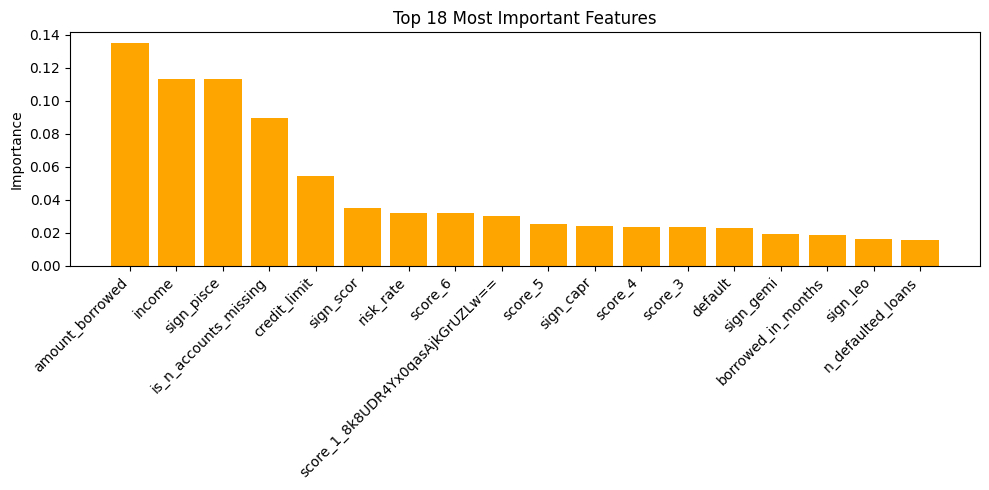

In [115]:
top_n = 18
top_indices = indices[:top_n]

plt.figure(figsize=(10, 5))
plt.bar(range(1, top_n + 1), importances2[top_indices], align="center", color="orange")
plt.xticks(range(1, top_n + 1),
           df_train.columns[top_indices],
           rotation=45, ha='right')
plt.title(f"Top {top_n} Most Important Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()